# Temporal irradiance variability

In this tutorial you will calculate the temporal variability of GHI in Copenhagen.

The first step is to import a few Python packages.

In [ ]:
# Install pvlib on Google Colab as this is not a standard package.
!pip install pvlib

In [1]:
import pvlib  # library for PV and solar calculations
import pandas as pd  # library for data analysis
import matplotlib.pyplot as plt  # library for plotting
import numpy as np  # library for math and linear algebra

## Step 1: Download data for Copenhagen

Download TMY data for Copenhagen using [``pvlib.iotools.get_pvgis_tmy``](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.iotools.get_pvgis_tmy.html). Note that this function returns two items (data, meta); the first is the requested data and the second the relevant metadata.

*Note that it is possible to specify which years to use for generating the TMY, although the period has to cover at least 10 years. Use the parameters ``startyear`` and ``endyear`` to specify the years from 2005 to 2023.*

In [4]:
# Copenhagen coordinates
latitude = 55.68
longitude = 12.56

# Get TMY from PVGIS (returns data, meta)
tmy, meta = pvlib.iotools.get_pvgis_tmy(latitude=latitude, longitude=longitude, startyear=2005, endyear=2023)

## Step 2: Which months were used to generate the TMY?

A TMY file contains 12 months of data, where each month is taken from a different year. Inspect the metadata object to determine which month was taken from which year.

In [7]:
# Write your code here


## Step 3: Plot the GHI

Plot the GHI and visually inspect the seasonal variability. Can you tell if this is an average year?

In [9]:
# write your code here

## Step 4: Interannual variability

Next, let's compare the interannual variability and compare with the irradiance in the TMY file.

To do this, download hourly data from 2003 to 2023 for Copenhagen using [``pvlib.iotools.get_pvgis_hourly``](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.iotools.get_pvgis_hourly.html). Note that ``pvgis`` returns the POA irradiance. However, setting a ``surface_tilt`` of zero, will return the POA for a horizontal surface (i.e., the GHI). Note that it also returns the irradiance components (i.e., direct and diffuse) so to find the GHI the two components need to be added.

Perform the following calculations:
1. Calculate and plot the yearly mean GHI
2. Identify the years with the lowest and highest mean GHI
3. Plot the mean GHI value from the TMY file
4. Assess whether the TMY file represents the long term average?

In [10]:
# Write your code here
data, meta = pvlib.iotools.get_pvgis_hourly(latitude = latitude,
                                          longitude = longitude,
                                          start = 2005,
                                          end = 2023,
                                          surface_tilt = 0)

data['ghi'] = data['poa_direct'] + data['poa_sky_diffuse']

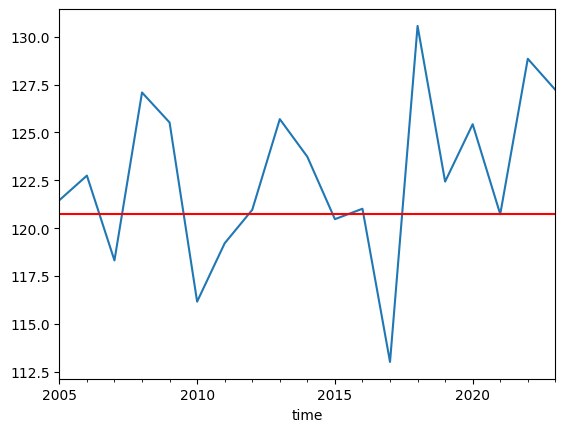

In [11]:
fig, ax = plt.subplots()
data['ghi'].resample('YE').mean().plot(ax=ax)
ax.axhline(tmy['ghi'].mean(), c='r', label='')

In [36]:
tmy['ghi'].mean()

120.72146118721462

## Step 5: Monthly variability

Calculate the **Coefficient Of Variation** (COV) of the daily average irradiance for the TMY dataset for the long-term time series.

Which dataset do you expect to have the largest coefficient of variation?

In [24]:
# Write your code here
data_daily = data.resample('1d').mean()
tmy_daily = tmy.resample('1d').mean()

data_daily_cov = data_daily['ghi'].std() / data_daily['ghi'].mean()
tmy_daily_cov = tmy_daily['ghi'].std() / tmy_daily['ghi'].mean()

print(f"Long term COV: {data_daily_cov:1.2f}")
print(f"TMY COV: {tmy_daily_cov:1.2f}")

Long term COV: 0.81
TMY COV: 0.78
